In [ ]:
import sys
from os import path

sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import imgkit

from isanet.neural_network import MLPRegressor
from isanet.model_selection import Kfold, GridSearchCV
import datetime

In [2]:
TS = np.genfromtxt('../dataset/ML-CUP19-TR.csv',delimiter=',')

<p>1765 samples, 22 features.</p>
<p>Le ultime due colonne sono il target.</p>
<p>La prima colonna è l'id del pattern.</p>

In [6]:
len(TS)

1765

In [4]:
type(TS)

numpy.ndarray

In [3]:
X = TS[:,1:-2] #escludo il target e l'id

In [6]:
len(X)

1765

In [7]:
a = 0
for x in X:
    a = len(x)
print(a)

20


In [4]:
df = pd.DataFrame(X, columns=list('ABCDEFGHILMNOPQRSTUV'))

In [5]:
df

,A,B,C,D,E,F,G,H,I,L,M,N,O,P,Q,R,S,T,U,V
0,0.403680,-1.263305,-1.405777,-1.204391,-1.150933,-0.015976,1.050295,-1.345922,0.403672,-1.150948,-0.015981,-0.500363,-0.500365,-1.204382,1.225213,-1.345921,1.050317,-1.405787,-1.263320,1.225203
1,-0.985474,1.495285,-0.947413,0.520832,0.116691,-1.118318,-1.221874,1.572023,-0.985460,0.116686,-1.118307,-0.971660,-0.971675,0.520839,-1.223266,1.572025,-1.221885,-0.947417,1.495302,-1.223278
2,-0.985464,1.270111,-1.864167,1.234743,1.595580,-1.187201,-1.162063,0.828218,-0.985472,1.595578,-1.187184,-1.065927,-1.065933,1.234736,-1.282981,0.828232,-1.162082,-1.864132,1.270108,-1.282998
3,0.908829,-0.756618,-0.214001,-0.490480,-1.643876,0.810767,0.272982,-0.430464,0.908829,-1.643889,0.810757,0.630728,0.630722,-0.490508,0.986357,-0.430480,0.272976,-0.214005,-0.756607,0.986312
4,-0.543471,0.481930,-0.305679,-0.252544,0.891350,0.466289,-1.281666,0.313303,-0.543465,0.891353,0.466275,0.347945,0.347952,-0.252513,-0.208066,0.313292,-1.281652,-0.305692,0.481929,-0.208044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,0.466818,0.538237,1.069432,0.996778,1.313897,0.466274,0.631742,0.313295,0.466807,1.313900,0.466289,0.724981,0.724969,0.996772,0.030831,0.313307,0.631736,1.069436,0.538250,0.030821
1761,1.224542,-0.925509,-0.489039,-1.620840,-1.291793,0.604076,0.930718,-1.231477,1.224543,-1.291784,0.604073,0.159437,0.159423,-1.620824,1.344660,-1.231501,0.930716,-0.489033,-0.925513,1.344648
1762,-0.859179,1.101226,-1.497439,-0.133560,0.327970,-0.842710,-1.042475,1.457594,-0.859182,0.327976,-0.842718,-1.254447,-1.254447,-0.133552,-1.223267,1.457604,-1.042485,-1.497459,1.101224,-1.223292
1763,-1.427481,1.213816,-1.497467,1.353714,1.102624,-1.324974,-1.401257,1.228742,-1.427477,1.102644,-1.324987,-2.762563,-2.762544,1.353723,-1.283006,1.228750,-1.401266,-1.497436,1.213812,-1.282992


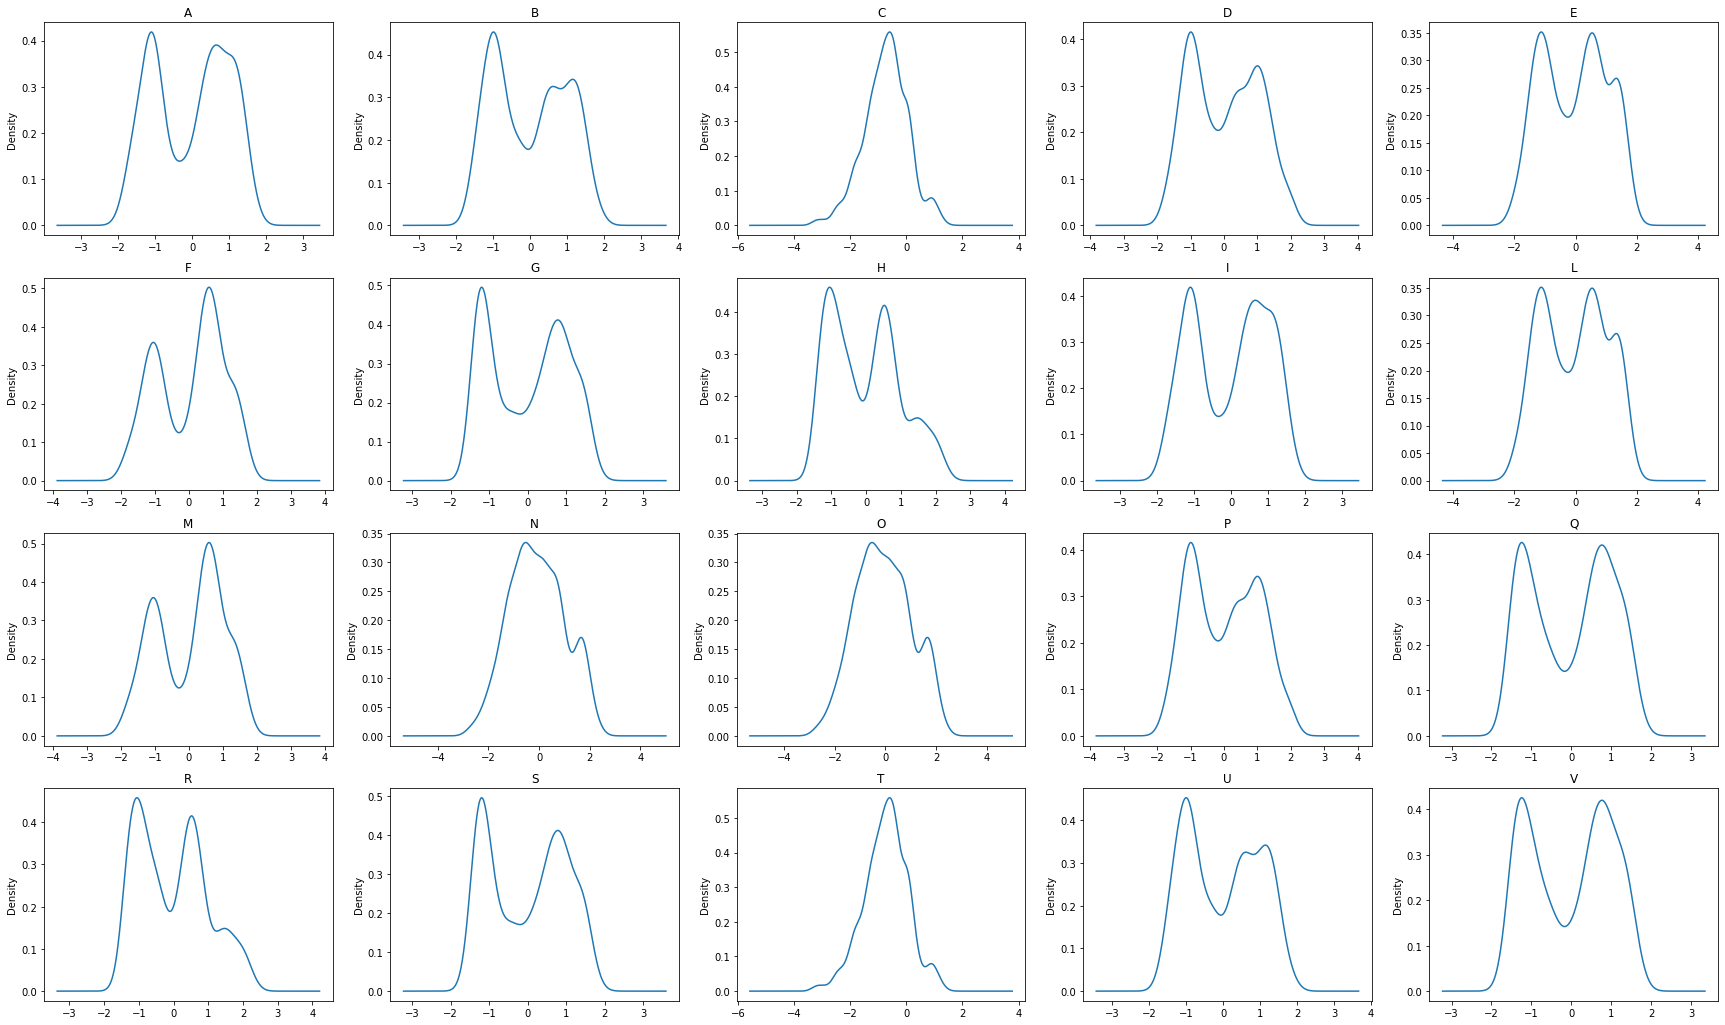

In [10]:
fig = plt.figure(figsize=(30, 18)) # any figure has 10x10 size
fig_dims = (4, 5) # 4 rows and 5 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['A'].plot(kind='kde')
plt.title('A')

plt.subplot2grid(fig_dims, (0, 1))
df['B'].plot(kind='kde')
plt.title('B')

plt.subplot2grid(fig_dims, (0, 2))
df['C'].plot(kind='kde')
plt.title('C')

plt.subplot2grid(fig_dims, (0, 3))
df['D'].plot(kind='kde')
plt.title('D')

plt.subplot2grid(fig_dims, (0, 4))
df['E'].plot(kind='kde')
plt.title('E')

plt.subplot2grid(fig_dims, (1, 0))
df['F'].plot(kind='kde')
plt.title('F')

plt.subplot2grid(fig_dims, (1, 1))
df['G'].plot(kind='kde')
plt.title('G')

plt.subplot2grid(fig_dims, (1, 2))
df['H'].plot(kind='kde')
plt.title('H')

plt.subplot2grid(fig_dims, (1, 3))
df['I'].plot(kind='kde')
plt.title('I')

plt.subplot2grid(fig_dims, (1, 4))
df['L'].plot(kind='kde')
plt.title('L')

plt.subplot2grid(fig_dims, (2, 0))
df['M'].plot(kind='kde')
plt.title('M')

plt.subplot2grid(fig_dims, (2, 1))
df['N'].plot(kind='kde')
plt.title('N')

plt.subplot2grid(fig_dims, (2, 2))
df['O'].plot(kind='kde')
plt.title('O')

plt.subplot2grid(fig_dims, (2, 3))
df['P'].plot(kind='kde')
plt.title('P')

plt.subplot2grid(fig_dims, (2, 4))
df['Q'].plot(kind='kde')
plt.title('Q')

plt.subplot2grid(fig_dims, (3, 0))
df['R'].plot(kind='kde')
plt.title('R')

plt.subplot2grid(fig_dims, (3, 1))
df['S'].plot(kind='kde')
plt.title('S')

plt.subplot2grid(fig_dims, (3, 2))
df['T'].plot(kind='kde')
plt.title('T')

plt.subplot2grid(fig_dims, (3, 3))
df['U'].plot(kind='kde')
plt.title('U')

plt.subplot2grid(fig_dims, (3, 4))
df['V'].plot(kind='kde')
plt.title('V')

plt.show()

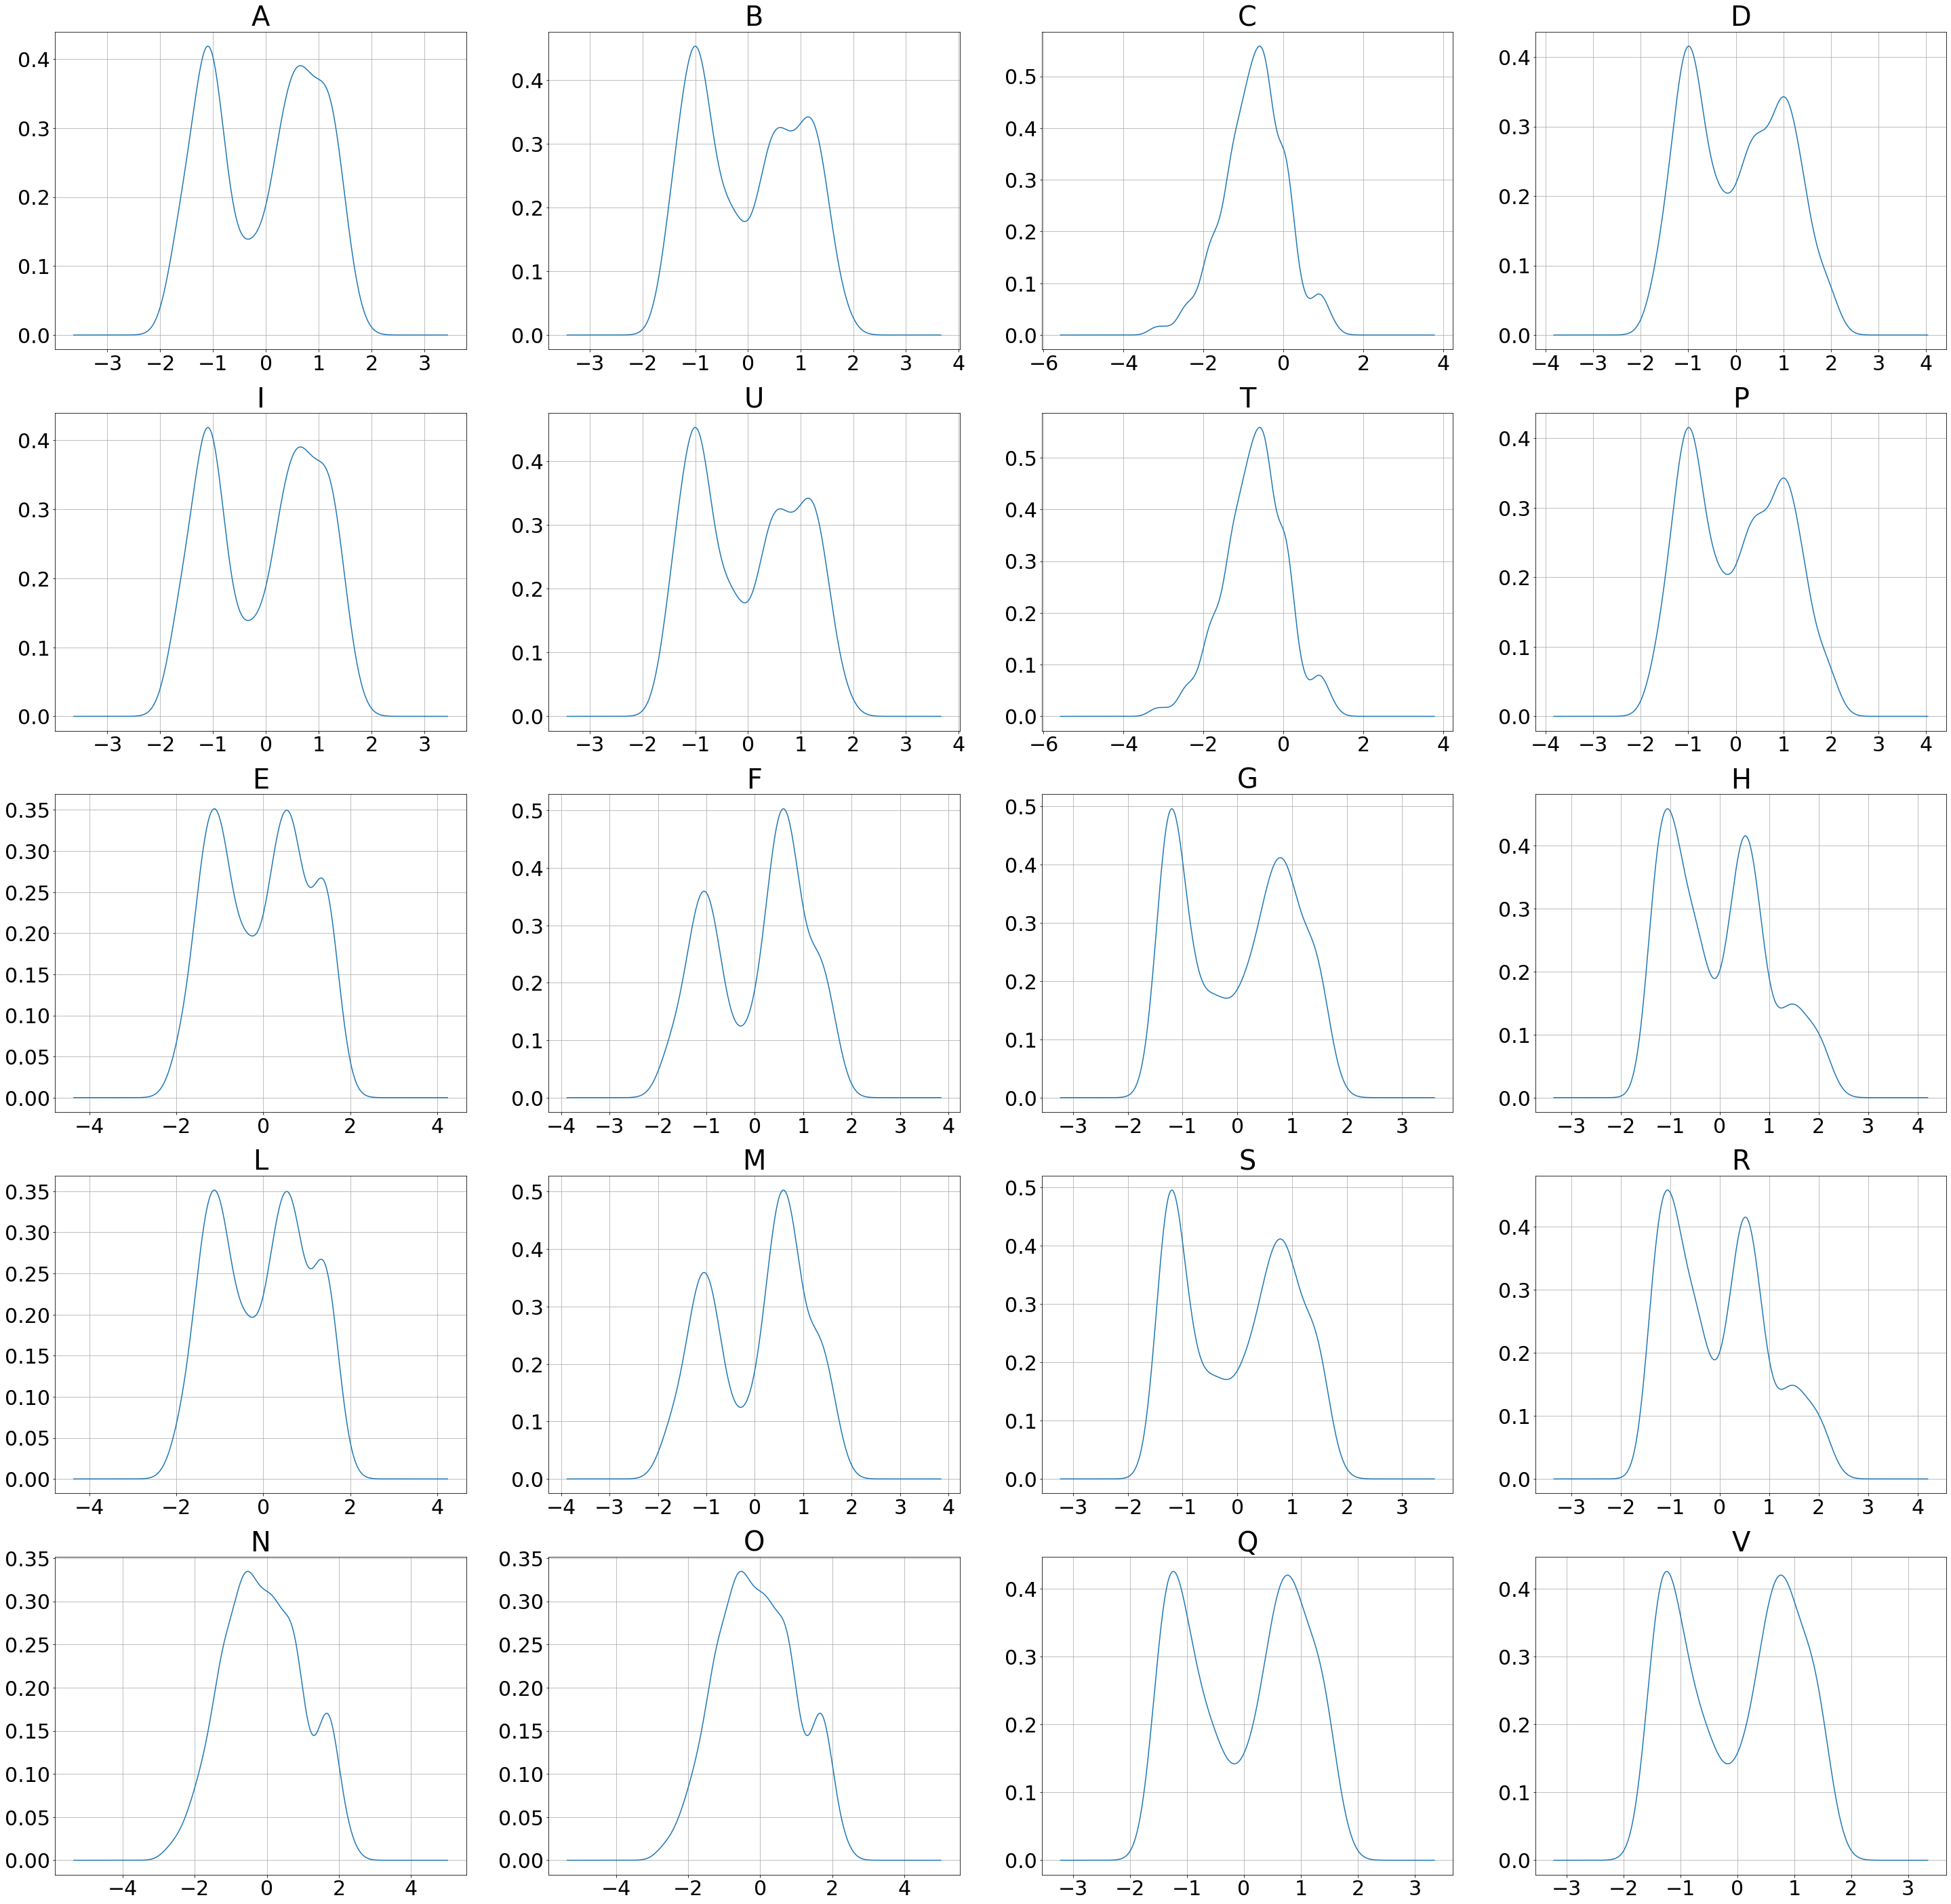

In [48]:
fig = plt.figure(figsize=(50, 50)) # any figure has 10x10 size
fig_dims = (5, 4) # 4 rows and 5 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['A'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16) 
plt.title('A', fontsize=40)

plt.subplot2grid(fig_dims, (0, 1))
df['B'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('B', fontsize=40)

plt.subplot2grid(fig_dims, (0, 2))
df['C'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('C', fontsize=40)

plt.subplot2grid(fig_dims, (0, 3))
df['D'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('D', fontsize=40)

plt.subplot2grid(fig_dims, (1, 0))
df['I'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('I', fontsize=40)

plt.subplot2grid(fig_dims, (1, 1))
df['U'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('U', fontsize=40)

plt.subplot2grid(fig_dims, (1, 2))
df['T'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('T', fontsize=40)

plt.subplot2grid(fig_dims, (1, 3))
df['P'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('P', fontsize=40)

plt.subplot2grid(fig_dims, (2, 0))
df['E'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('E', fontsize=40)

plt.subplot2grid(fig_dims, (2, 1))
df['F'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('F', fontsize=40)

plt.subplot2grid(fig_dims, (2, 2))
df['G'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('G', fontsize=40)

plt.subplot2grid(fig_dims, (2, 3))
df['H'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('H', fontsize=40)

plt.subplot2grid(fig_dims, (3, 0))
df['L'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('L', fontsize=40)

plt.subplot2grid(fig_dims, (3, 1))
df['M'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('M', fontsize=40)

plt.subplot2grid(fig_dims, (3, 2))
df['S'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('S', fontsize=40)

plt.subplot2grid(fig_dims, (3, 3))
df['R'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('R', fontsize=40)

plt.subplot2grid(fig_dims, (4, 0))
df['N'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('N', fontsize=40)

plt.subplot2grid(fig_dims, (4, 1))
df['O'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('O', fontsize=40)

plt.subplot2grid(fig_dims, (4, 2))
df['Q'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('Q', fontsize=40)

plt.subplot2grid(fig_dims, (4, 3))
df['V'].plot(kind='kde', fontsize=30)
plt.grid()
plt.ylabel('', fontsize=16)
plt.title('V', fontsize=40)

plt.savefig("preprocessing_phase/distributions.eps")
plt.show()

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='Wistia').set_precision(2)

,A,B,C,D,E,F,G,H,I,L,M,N,O,P,Q,R,S,T,U,V
A,1,-0.86,0.23,-0.82,-0.75,0.85,0.87,-0.82,1,-0.75,0.85,0.54,0.54,-0.82,0.89,-0.82,0.87,0.23,-0.86,0.89
B,-0.86,1,-0.13,0.86,0.79,-0.78,-0.9,0.89,-0.86,0.79,-0.78,-0.39,-0.39,0.86,-0.89,0.89,-0.9,-0.13,1,-0.89
C,0.23,-0.13,1,0.016,0.14,0.39,0.19,-0.17,0.23,0.14,0.39,0.58,0.58,0.016,0.19,-0.17,0.19,1,-0.13,0.19
D,-0.82,0.86,0.016,1,0.88,-0.7,-0.84,0.76,-0.82,0.88,-0.7,-0.28,-0.28,1,-0.84,0.76,-0.84,0.016,0.86,-0.84
E,-0.75,0.79,0.14,0.88,1,-0.62,-0.78,0.71,-0.75,1,-0.62,-0.17,-0.17,0.88,-0.79,0.71,-0.78,0.14,0.79,-0.79
F,0.85,-0.78,0.39,-0.7,-0.62,1,0.81,-0.77,0.85,-0.62,1,0.67,0.67,-0.7,0.83,-0.77,0.81,0.39,-0.78,0.83
G,0.87,-0.9,0.19,-0.84,-0.78,0.81,1,-0.87,0.87,-0.78,0.81,0.45,0.45,-0.84,0.91,-0.87,1,0.19,-0.9,0.91
H,-0.82,0.89,-0.17,0.76,0.71,-0.77,-0.87,1,-0.82,0.71,-0.77,-0.4,-0.4,0.76,-0.88,1,-0.87,-0.17,0.89,-0.88
I,1,-0.86,0.23,-0.82,-0.75,0.85,0.87,-0.82,1,-0.75,0.85,0.54,0.54,-0.82,0.89,-0.82,0.87,0.23,-0.86,0.89
L,-0.75,0.79,0.14,0.88,1,-0.62,-0.78,0.71,-0.75,1,-0.62,-0.17,-0.17,0.88,-0.79,0.71,-0.78,0.14,0.79,-0.79


In [6]:
df.corr()

,A,B,C,D,E,F,G,H,I,L,M,N,O,P,Q,R,S,T,U,V
A,1.000000,-0.856916,0.231974,-0.817516,-0.748196,0.847559,0.870998,-0.817904,1.000000,-0.748196,0.847559,0.537054,0.537054,-0.817516,0.888855,-0.817904,0.870998,0.231975,-0.856917,0.888855
B,-0.856916,1.000000,-0.134023,0.855002,0.789434,-0.780280,-0.896908,0.885321,-0.856916,0.789434,-0.780280,-0.385159,-0.385158,0.855002,-0.893083,0.885321,-0.896908,-0.134024,1.000000,-0.893083
C,0.231974,-0.134023,1.000000,0.015674,0.136105,0.392730,0.185124,-0.172139,0.231975,0.136105,0.392730,0.577230,0.577230,0.015674,0.192008,-0.172139,0.185124,1.000000,-0.134023,0.192007
D,-0.817516,0.855002,0.015674,1.000000,0.876042,-0.700648,-0.838802,0.761642,-0.817516,0.876042,-0.700648,-0.276555,-0.276555,1.000000,-0.838156,0.761642,-0.838802,0.015674,0.855002,-0.838156
E,-0.748196,0.789434,0.136105,0.876042,1.000000,-0.616389,-0.784693,0.708916,-0.748197,1.000000,-0.616389,-0.173048,-0.173048,0.876043,-0.785143,0.708916,-0.784693,0.136105,0.789434,-0.785143
F,0.847559,-0.780280,0.392730,-0.700648,-0.616389,1.000000,0.811977,-0.770657,0.847559,-0.616389,1.000000,0.669106,0.669106,-0.700649,0.825329,-0.770657,0.811977,0.392731,-0.780280,0.825329
G,0.870998,-0.896908,0.185124,-0.838802,-0.784693,0.811977,1.000000,-0.867904,0.870998,-0.784694,0.811977,0.453855,0.453855,-0.838802,0.905775,-0.867904,1.000000,0.185124,-0.896908,0.905775
H,-0.817904,0.885321,-0.172139,0.761642,0.708916,-0.770657,-0.867904,1.000000,-0.817904,0.708916,-0.770657,-0.400594,-0.400594,0.761642,-0.877415,1.000000,-0.867904,-0.172139,0.885321,-0.877415
I,1.000000,-0.856916,0.231975,-0.817516,-0.748197,0.847559,0.870998,-0.817904,1.000000,-0.748197,0.847559,0.537054,0.537054,-0.817516,0.888855,-0.817904,0.870998,0.231975,-0.856917,0.888855
L,-0.748196,0.789434,0.136105,0.876042,1.000000,-0.616389,-0.784694,0.708916,-0.748197,1.000000,-0.616389,-0.173048,-0.173048,0.876042,-0.785143,0.708916,-0.784694,0.136105,0.789434,-0.785143


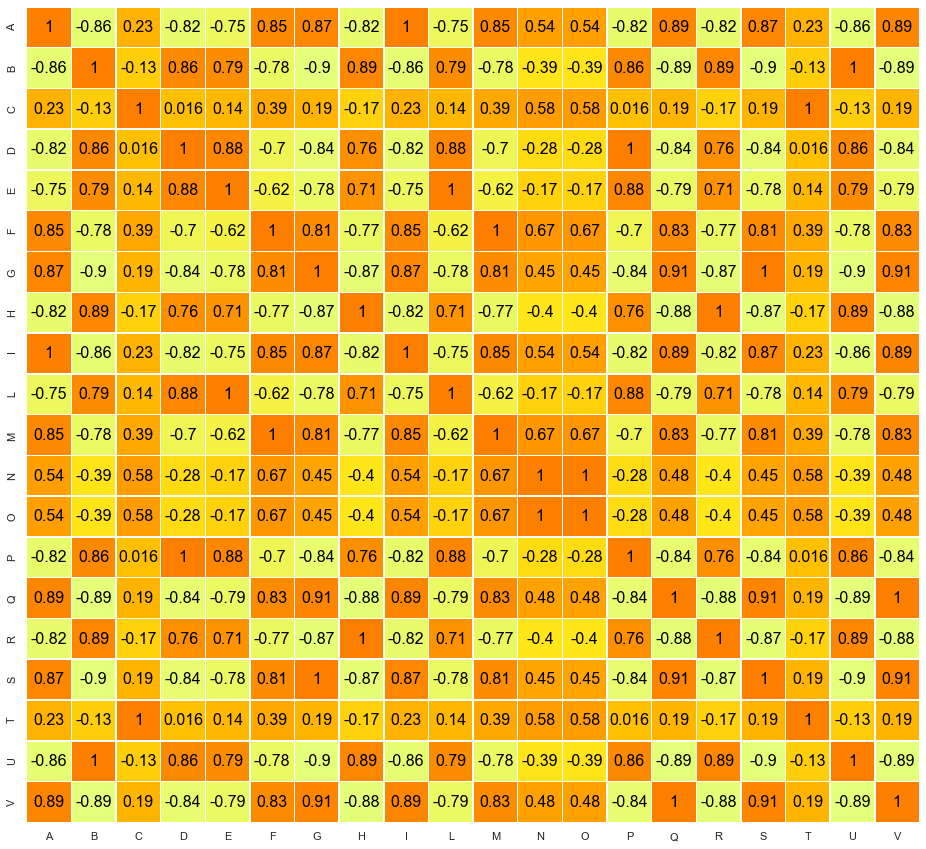

In [35]:
fig, ax = plt.subplots(figsize=(16,15))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, annot_kws={'size':16, 'color':'Black'}, cbar=False, cmap="Wistia")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax.set_ylim(b,t) # update the ylim(bottom, top) values
plt.savefig("preprocessing_phase/correlation_matrix.eps")

Molte features sono strettamente correlate tra loro:
<ul>
    <li> D, P
    <li> E, L
    <li> N, O
    <li> V, Q
    <li> R, H
    <li> F, M
    <li> T, C
    <li> S, G
    <li> A, I
    <li> B, U
</ul>

# Pulisco il dataset

<p>Elimino:</p>
<ul>
    <li> A
    <li> B
    <li> C
    <li> D
    <li> E
    <li> F
    <li> G
    <li> H
    <li> N 
    <li> Q 
</ul>

In [16]:
df1 = pd.DataFrame(TS, columns=list('#ABCDEFGHILMNOPQRSTUVXY'))

In [17]:
del df1['#']
del df1['A']
del df1['B']
del df1['C']
del df1['D']
del df1['E']
del df1['F']
del df1['G']
del df1['H']
del df1['N']
del df1['Q']

In [5]:
df1

,I,L,M,O,P,R,S,T,U,V,X,Y
0,0.403672,-1.150948,-0.015981,-0.500365,-1.204382,-1.345921,1.050317,-1.405787,-1.263320,1.225203,4.130912,-0.288271
1,-0.985460,0.116686,-1.118307,-0.971675,0.520839,1.572025,-1.221885,-0.947417,1.495302,-1.223278,29.499045,-4.535635
2,-0.985472,1.595578,-1.187184,-1.065933,1.234736,0.828232,-1.162082,-1.864132,1.270108,-1.282998,24.145767,-9.474121
3,0.908829,-1.643889,0.810757,0.630722,-0.490508,-0.430480,0.272976,-0.214005,-0.756607,0.986312,12.543412,-9.214210
4,-0.543465,0.891353,0.466275,0.347952,-0.252513,0.313292,-1.281652,-0.305692,0.481929,-0.208044,19.650184,-13.604542
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,0.466807,1.313900,0.466289,0.724969,0.996772,0.313307,0.631736,1.069436,0.538250,0.030821,17.107064,-14.230131
1761,1.224543,-1.291784,0.604073,0.159423,-1.620824,-1.231501,0.930716,-0.489033,-0.925513,1.344648,7.439563,-3.841417
1762,-0.859182,0.327976,-0.842718,-1.254447,-0.133552,1.457604,-1.042485,-1.497459,1.101224,-1.223292,30.174705,-3.896773
1763,-1.427477,1.102644,-1.324987,-2.762544,1.353723,1.228750,-1.401266,-1.497436,1.213812,-1.282992,26.407248,-7.409214


In [18]:
#Dopo aver eliminato le features lo ritrasformo in un array numpy
train_data = df1.to_numpy()

In [19]:
train_data

array([[ 4.03672346e-01, -1.15094796e+00, -1.59814365e-02, ...,
         1.22520306e+00,  4.13091198e+00, -2.88270840e-01],
       [-9.85459895e-01,  1.16686048e-01, -1.11830737e+00, ...,
        -1.22327817e+00,  2.94990452e+01, -4.53563461e+00],
       [-9.85472010e-01,  1.59557826e+00, -1.18718371e+00, ...,
        -1.28299810e+00,  2.41457673e+01, -9.47412107e+00],
       ...,
       [-8.59182296e-01,  3.27975623e-01, -8.42718483e-01, ...,
        -1.22329202e+00,  3.01747054e+01, -3.89677291e+00],
       [-1.42747699e+00,  1.10264362e+00, -1.32498743e+00, ...,
        -1.28299208e+00,  2.64072482e+01, -7.40921373e+00],
       [ 5.93097012e-01, -1.08051717e+00,  8.79667822e-01, ...,
         7.47479094e-01,  1.43599922e+01, -1.11883817e+01]])

In [21]:
len(train_data)

1765

In [20]:
a = 0
for x in train_data:
    a = len(x)
print(a)

12


Faccio lo shuffle del dataset

In [21]:
np.random.shuffle(train_data)

In [9]:
train_data 

array([[  0.78252522,   0.32797905,   1.22415213, ...,   0.26971282,
         15.5995156 , -12.53246819],
       [  0.65626481,  -1.15092588,   0.25960049, ...,   0.68773855,
          3.69801583,   0.18518912],
       [  1.28768776,  -0.72839662,   1.56862065, ...,   0.68775597,
         13.23832817,  -9.99203214],
       ...,
       [ -0.92232181,   0.53923328,  -1.32499126, ...,  -1.40245608,
         29.11232073,  -4.88159333],
       [  1.28767763,  -0.0945912 ,   1.70641499, ...,   0.4488395 ,
         14.12772081, -10.93313067],
       [ -1.68005113,   0.46880471,  -1.39387129, ...,  -1.40243981,
         28.6308031 ,  -5.32945953]])

Divido il datset in TR(1235 - 70%) e VL(530 - 30%)

In [29]:
tr_val = train_data[:1500,:]
test = train_data[1500:,:]

In [31]:
tr_val.shape

(1500, 12)

In [32]:
test.shape

(265, 12)

In [33]:
X_train = tr_val[:1235,:-2]
Y_train = tr_val[:1235,-2:]
    
X_val = tr_val[1235:,:-2]
Y_val = tr_val[1235:,-2:]

In [34]:
X_train.shape

(1235, 10)

In [35]:
Y_train.shape

(1235, 2)

In [36]:
X_val.shape

(265, 10)

In [37]:
Y_val.shape

(265, 2)

In [38]:
def plotCup(history):
    plt.plot(history["loss_mse"])
    plt.plot(history["val_loss_mse"], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.grid()
    plt.legend(['Training', 'Test'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

def plotCupCut(history, cut= 100):
    plt.plot(history["loss_mse"][cut:])
    plt.plot(history["val_loss_mse"][cut:], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.xlim(left = cut)
    plt.grid()
    plt.legend(['Training', 'Test'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

def plotCupCutUnder(history, cut= 100):
    plt.plot(history["loss_mse"][:cut])
    plt.plot(history["val_loss_mse"][:cut], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.grid()
    plt.legend(['Training', 'Test'], loc='upper right', fontsize='large')
    plt.tight_layout()
    plt.show()

# Overfitting

## 10

MSE train: 0.9565888638259943 
MSE val: 1.1033926564535477 


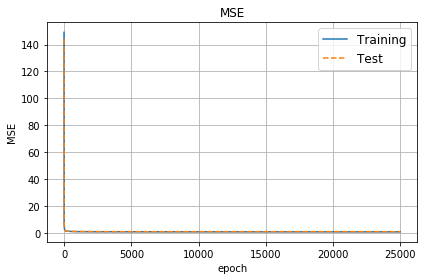

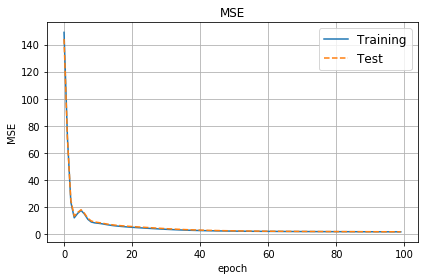

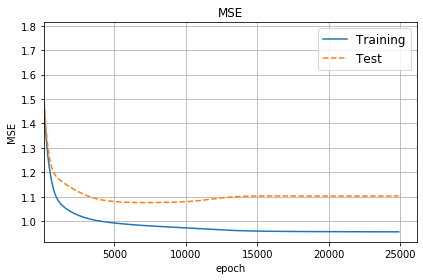

In [80]:
param = {
            "n_layer_units": [10], # con questo si specifica la topologia da provare
            "learning_rate": 0.05,
            "momentum": 0.8,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.9076230075499622 
MSE val: 1.1362713763935313 


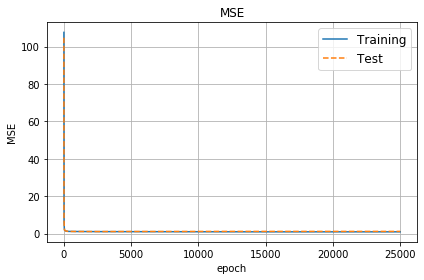

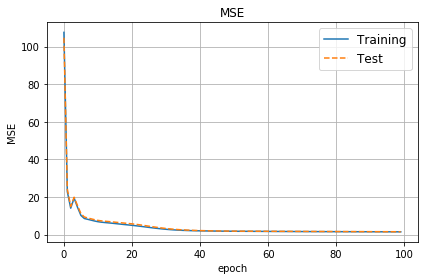

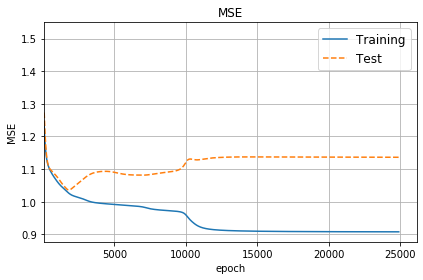

In [104]:
param = {
            "n_layer_units": [10], # con questo si specifica la topologia da provare
            "learning_rate": 0.09,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## 20

MSE train: 0.7928541221487124 
MSE val: 0.9746481658940538 


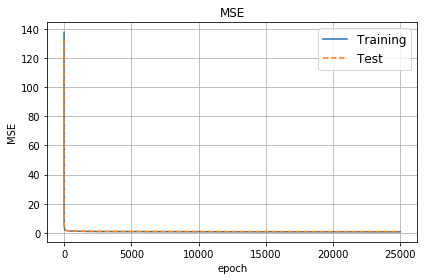

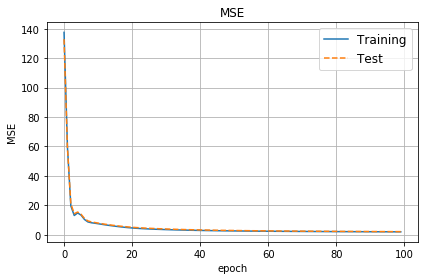

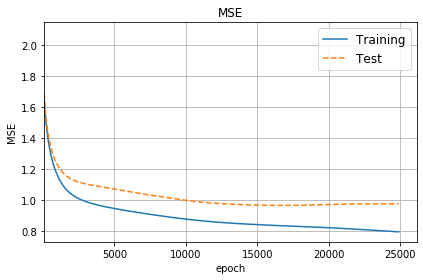

In [79]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.035,
            "momentum": 0.75,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.672550002893657 
MSE val: 1.1211805488349378 


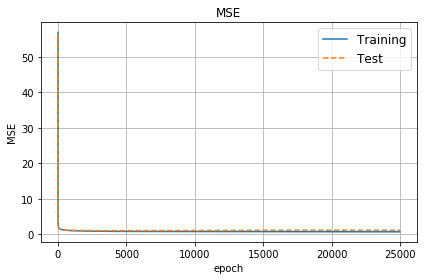

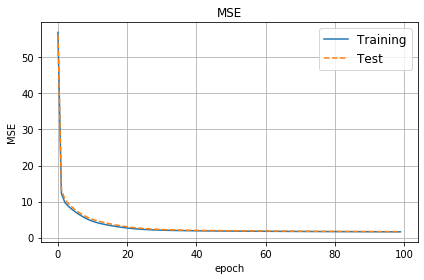

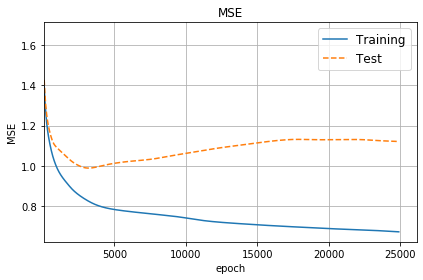

In [106]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.09,
            "momentum": 0.75,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7492499405051697 
MSE val: 1.02348709406797 


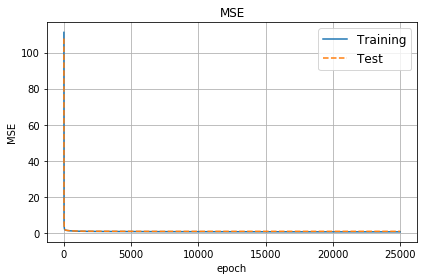

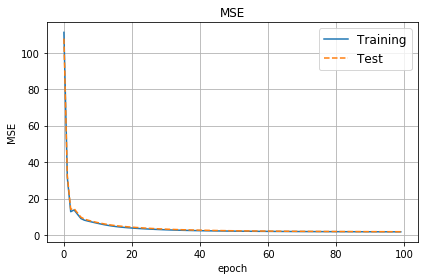

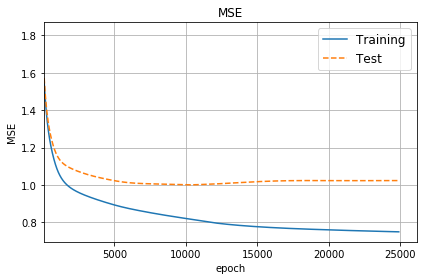

In [81]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.05,
            "momentum": 0.75,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## 30

MSE train: 0.6185881529740872 
MSE val: 1.0285686592691885 


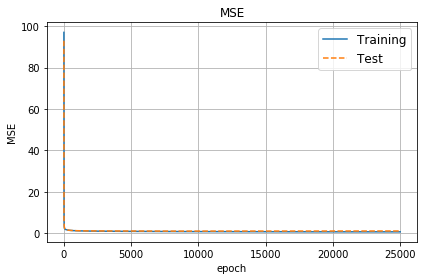

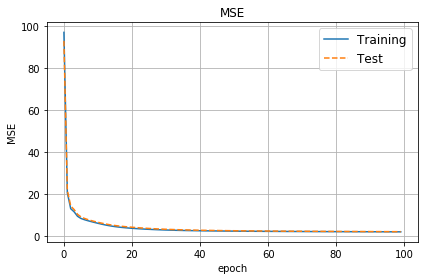

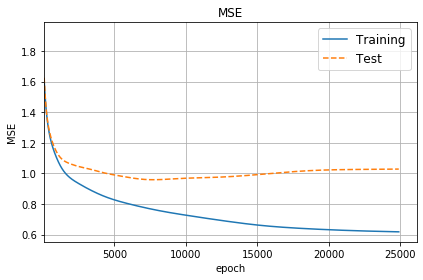

In [82]:
param = {
            "n_layer_units": [30], # con questo si specifica la topologia da provare
            "learning_rate": 0.055,
            "momentum": 0.75,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.8030264605890757 
MSE val: 0.9972835007635721 


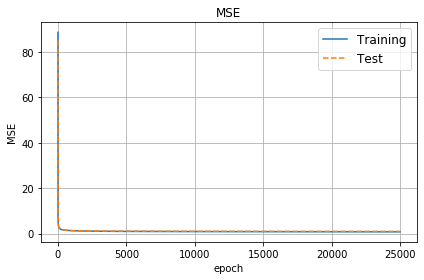

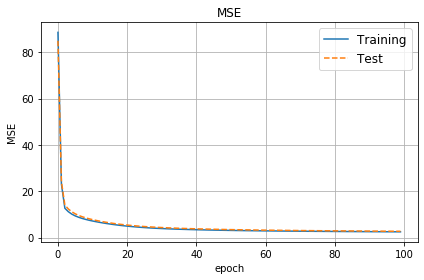

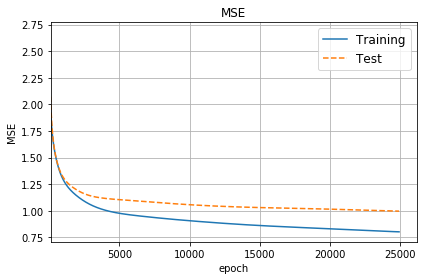

In [108]:
param = {
            "n_layer_units": [30], # con questo si specifica la topologia da provare
            "learning_rate": 0.06,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## underfitting

MSE train: 0.8974104993783674 
MSE val: 1.0494908414114874 


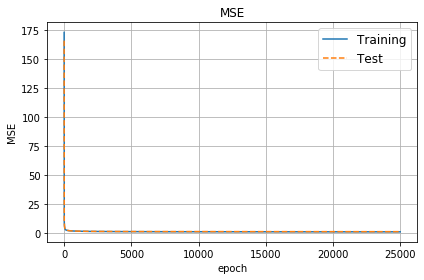

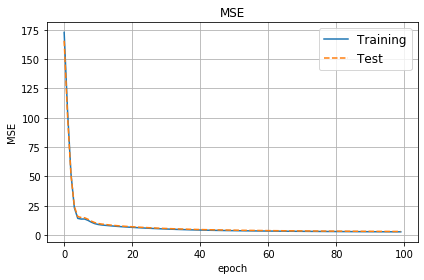

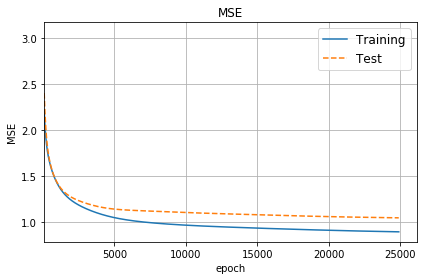

In [114]:
param = {
            "n_layer_units": [30], # con questo si specifica la topologia da provare
            "learning_rate": 0.02,
            "momentum": 0.7,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 1.0903312387256496 
MSE val: 1.17686419854088 


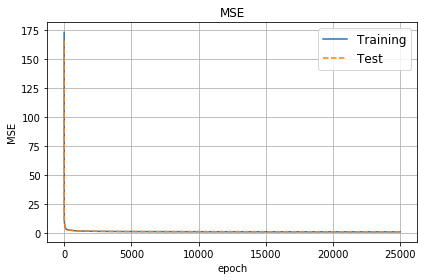

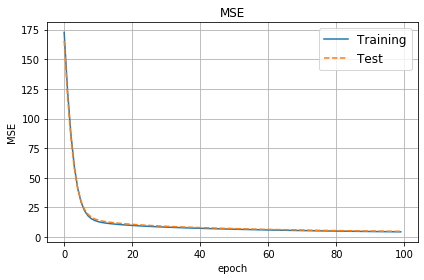

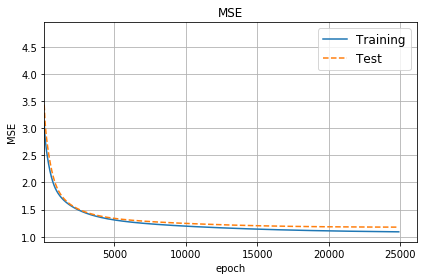

In [116]:
param = {
            "n_layer_units": [30], # con questo si specifica la topologia da provare
            "learning_rate": 0.02,
            "momentum": 0.2,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## 40

MSE train: 0.7153426798969793 
MSE val: 0.9513564760784242 


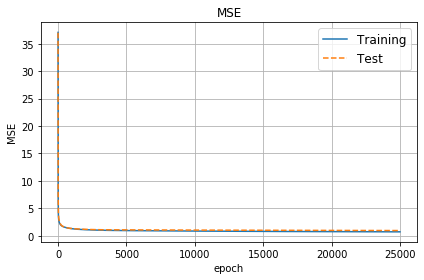

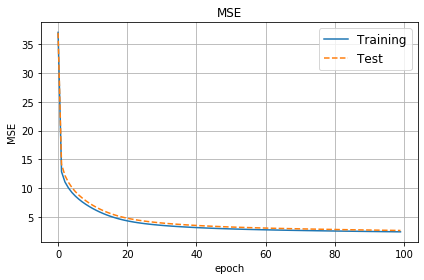

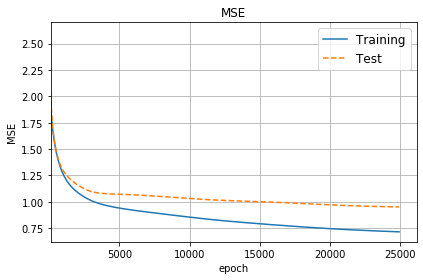

In [111]:
param = {
            "n_layer_units": [40], # con questo si specifica la topologia da provare
            "learning_rate": 0.07,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7022752415524052 
MSE val: 0.9326586135996707 


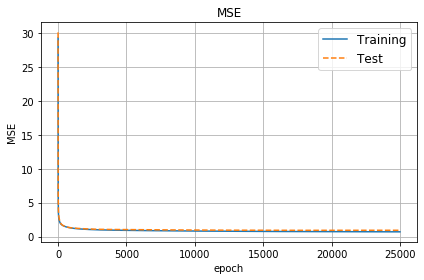

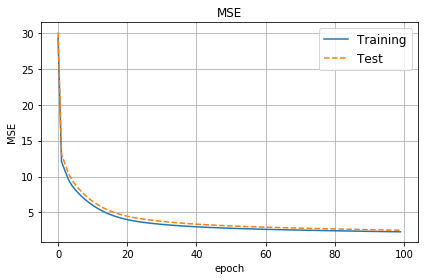

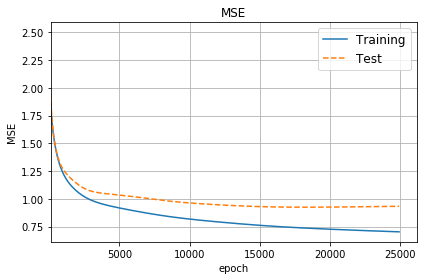

In [112]:
param = {
            "n_layer_units": [40], # con questo si specifica la topologia da provare
            "learning_rate": 0.08,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.8382127887909789 
MSE val: 0.9921274326578988 


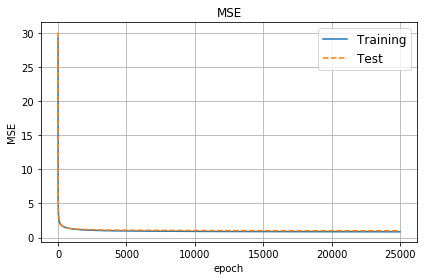

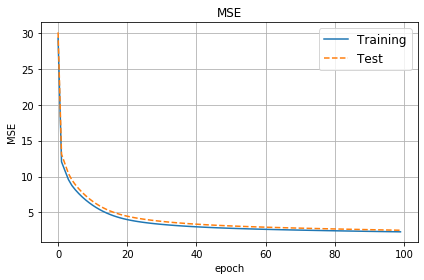

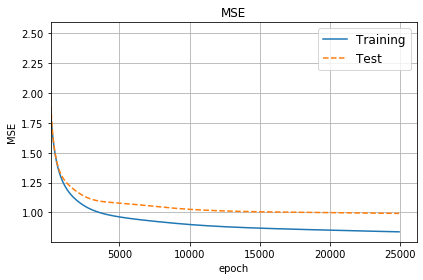

In [122]:
param = {
            "n_layer_units": [40], # con questo si specifica la topologia da provare
            "learning_rate": 0.08,
            "momentum": 0.4,
            "nesterov": True,
            "kernel_regularizer": 0.0002,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## 50

MSE train: 0.6113253721787798 
MSE val: 0.7905112046060766 


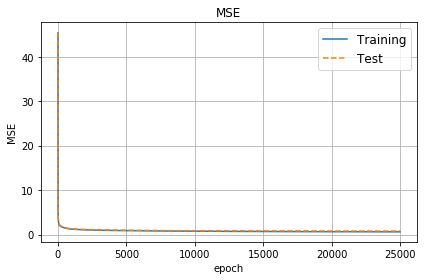

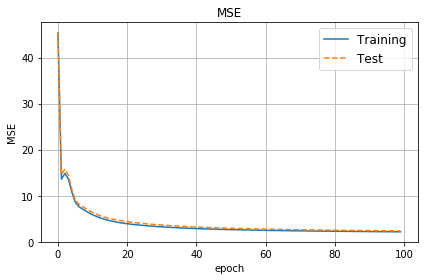

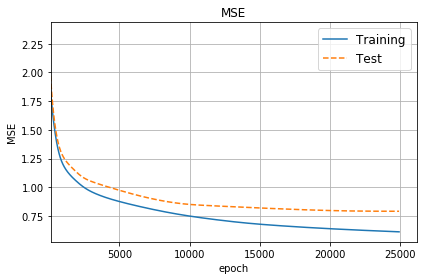

In [84]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.07,
            "momentum": 0.6,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.5958675505396462 
MSE val: 0.9818261003112762 


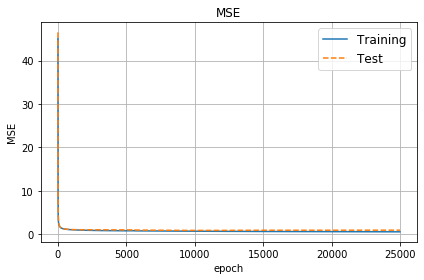

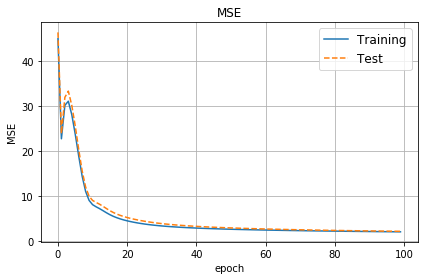

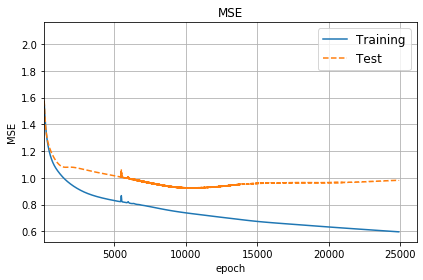

In [88]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.08,
            "momentum": 0.7,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.4001351211517705 
MSE val: 1.1583977598119188 


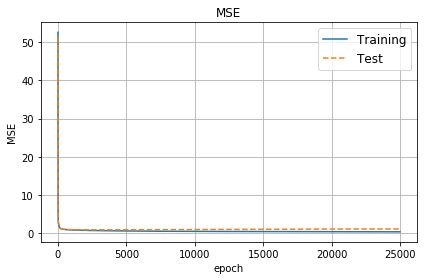

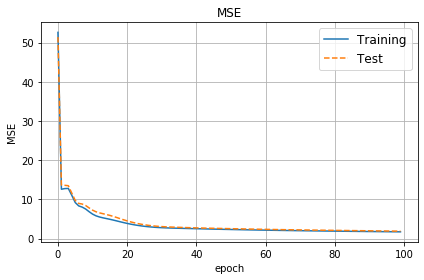

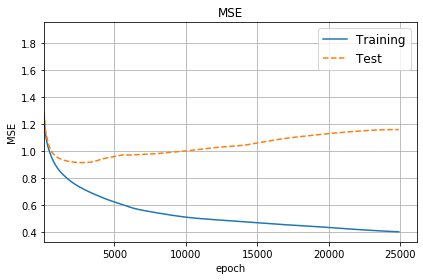

In [89]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.06,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.39204514756329994 
MSE val: 0.9888077082502489 


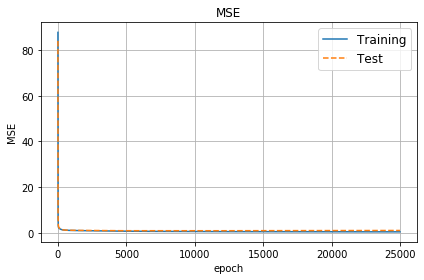

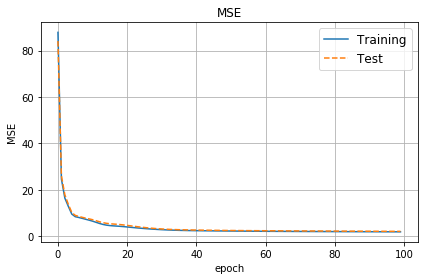

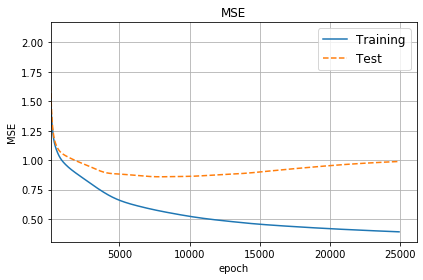

In [90]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.04,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7444528438673677 
MSE val: 0.8989193891085543 


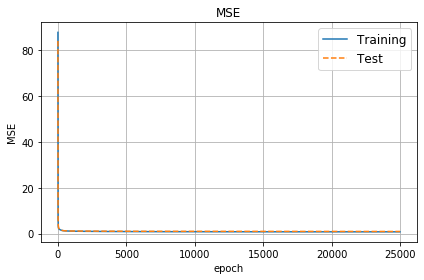

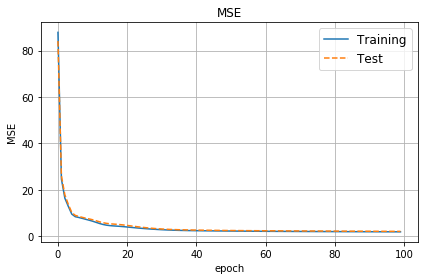

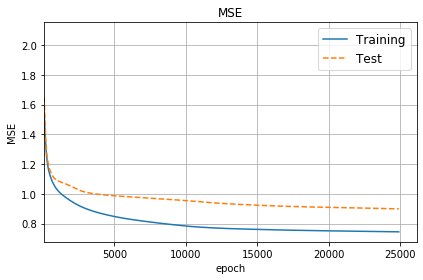

In [126]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.04,
            "momentum": 0.9,
            "nesterov": True,
            "kernel_regularizer": 0.0005,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.698724481003637 
MSE val: 0.8883955848867312 


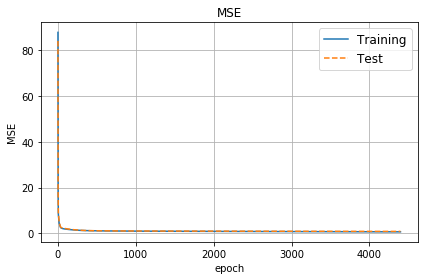

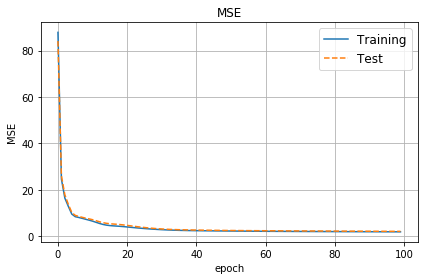

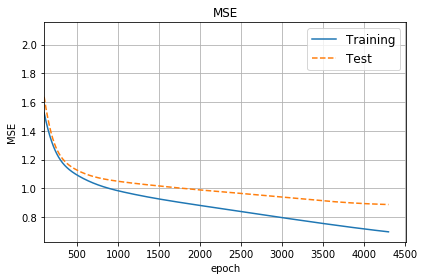

In [94]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.04,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 4400
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## underfitting

MSE train: 0.948747041960005 
MSE val: 1.0914800854488633 


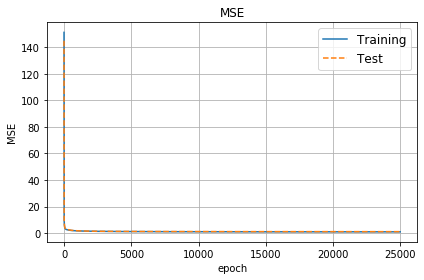

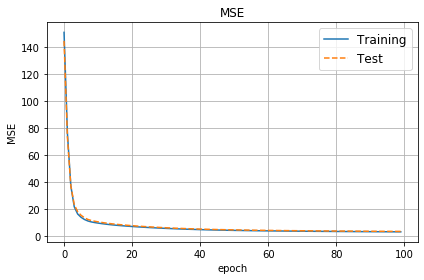

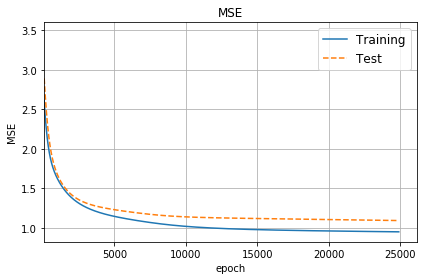

In [117]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.02,
            "momentum": 0.6,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7879693529978186 
MSE val: 0.9789733134571462 


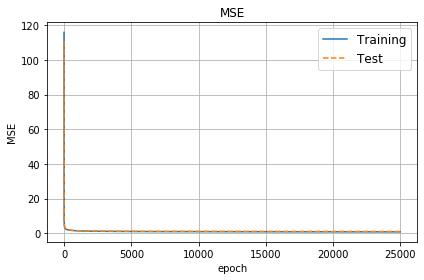

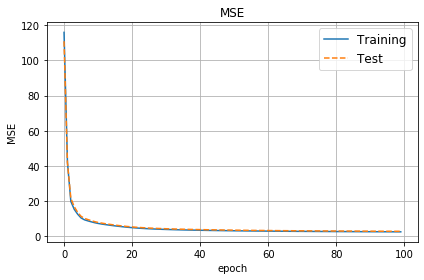

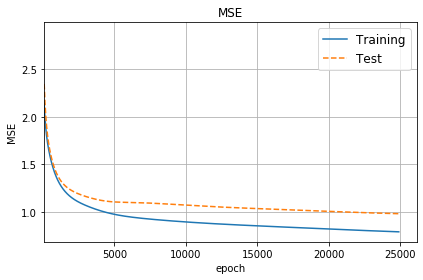

In [119]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.03,
            "momentum": 0.7,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

## 200

MSE train: nan 
MSE val: nan 


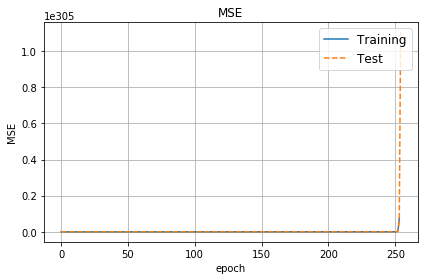

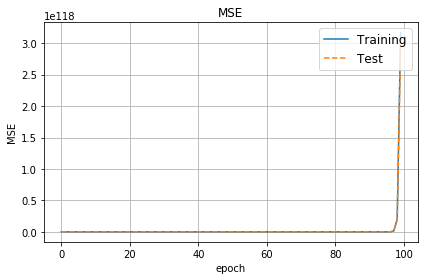

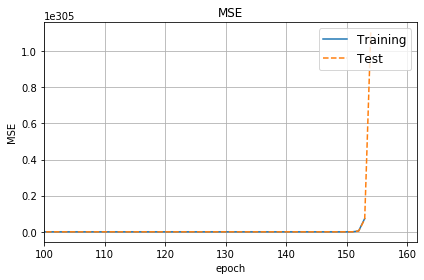

In [95]:
param = {
            "n_layer_units": [200], # con questo si specifica la topologia da provare
            "learning_rate": 0.07,
            "momentum": 0.6,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 1500
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7765187406265689 
MSE val: 0.9502518893671357 


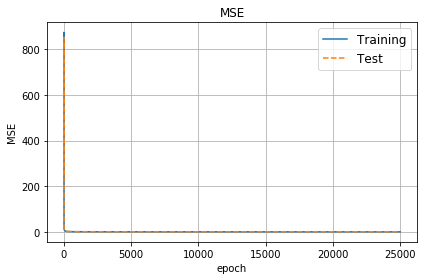

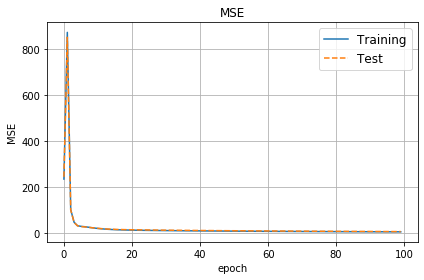

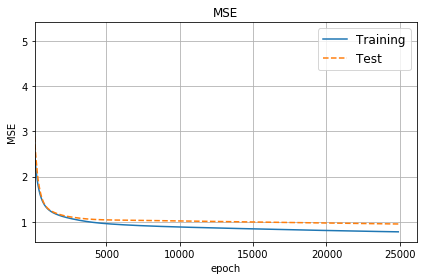

In [98]:
param = {
            "n_layer_units": [200], # con questo si specifica la topologia da provare
            "learning_rate": 0.04,
            "momentum": 0.6,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 1.217953216128678 
MSE val: 1.2750211305579715 


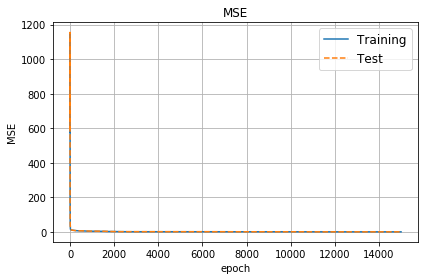

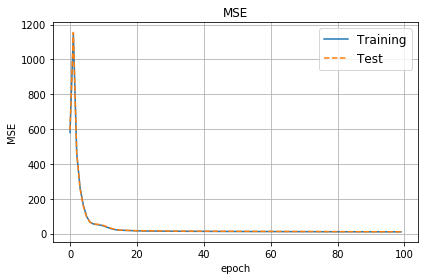

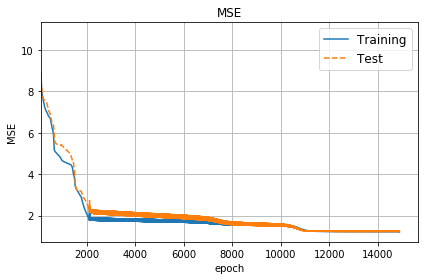

In [115]:
param = {
            "n_layer_units": [120], # con questo si specifica la topologia da provare
            "learning_rate": 0.09,
            "momentum": 0.8,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 15000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

--- 58.067317485809326 seconds ---


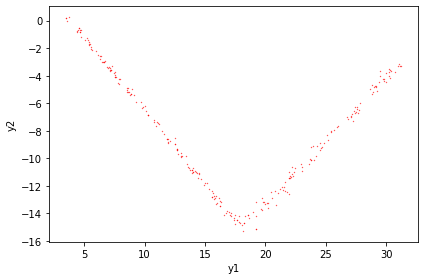

MSE test: 0.9474404952503733 


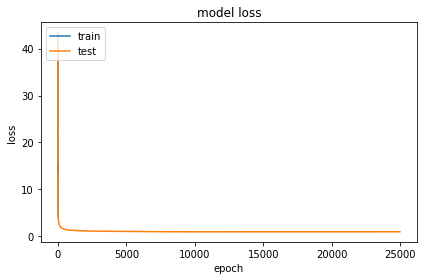

In [85]:
model = Mlp()
model.add(50, activation="sigmoid", input= 10, kernel_initializer = 1/np.sqrt(10), kernel_regularizer = 0.0001)
model.add(2, activation="linear", kernel_initializer = 1/np.sqrt(100), kernel_regularizer = 0.0001)

model.set_optimizer(
    SGD(
        lr = 0.07,
        momentum = 0.6,
        nesterov = True
    ))
# Batch
start_time = time.time()
model.fit(X_train,
            Y_train, 
            epochs=25000, 
            #batch_size=31,
            validation_data = [X_val, Y_val],
            verbose=0) 

print("--- %s seconds ---" % (time.time() - start_time))
outputNet = model.predict(X_val)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

printMSE(outputNet, Y_val, type = "test")
plt.plot(model.history["loss_mse"][:20])
plt.plot(model.history["val_loss_mse"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

MSE train: 1.059681588088523 
MSE val: 1.2047204770899178 


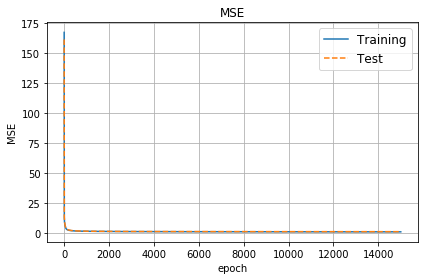

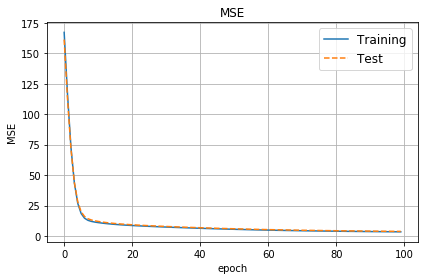

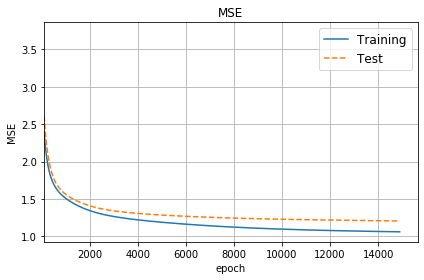

In [52]:
param = {
            "n_layer_units": [20], # con questo si specifica la topologia da provare
            "learning_rate": 0.02,
            "momentum": 0.5,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 15000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7822878332768192 
MSE val: 0.9163578958873887 


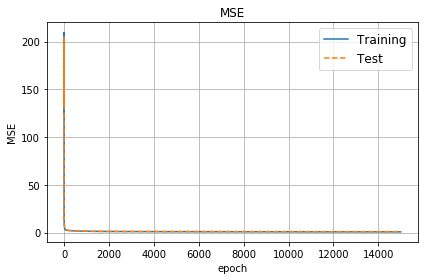

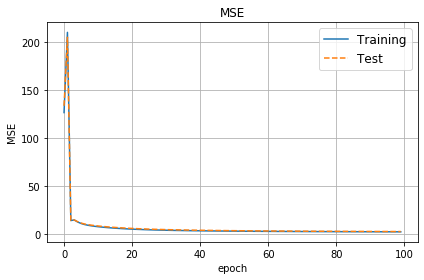

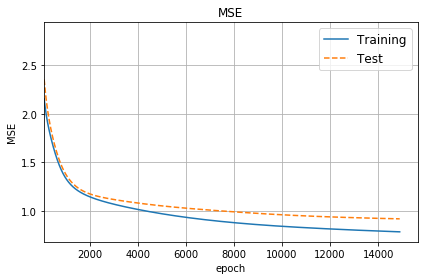

In [78]:
param = {
            "n_layer_units": [100], # con questo si specifica la topologia da provare
            "learning_rate": 0.065,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 15000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: nan 
MSE val: nan 


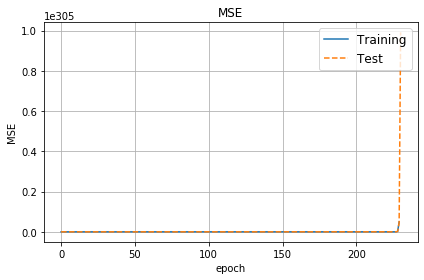

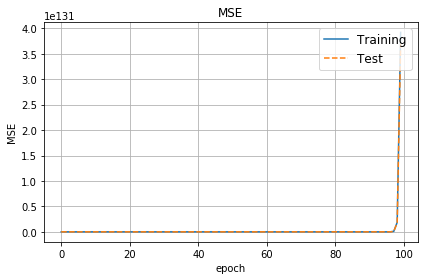

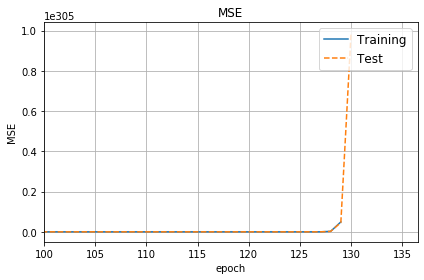

In [86]:
param = {
            "n_layer_units": [280], # con questo si specifica la topologia da provare
            "learning_rate": 0.065,
            "momentum": 0.4,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

--- 26.3284809589386 seconds ---


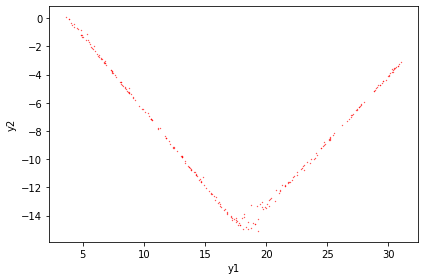

MSE test: 0.9734416874406188 


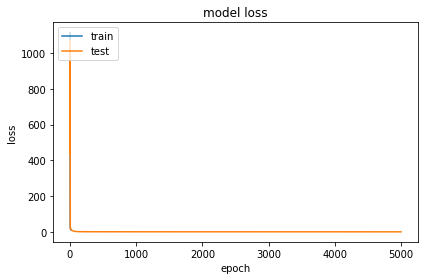

In [71]:
model = Mlp()
model.add(100, activation="sigmoid", input= 10, kernel_initializer = 1/np.sqrt(10), kernel_regularizer = 0.0001)
model.add(2, activation="linear", kernel_initializer = 1/np.sqrt(100), kernel_regularizer = 0.0001)

model.set_optimizer(
    SGD(
        lr = 0.1,
        momentum = 0.3,
        nesterov = True
    ))
# Batch
start_time = time.time()
model.fit(X_train,
            Y_train, 
            epochs=5000, 
            #batch_size=31,
            validation_data = [X_val, Y_val],
            verbose=0) 

print("--- %s seconds ---" % (time.time() - start_time))
outputNet = model.predict(X_val)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

printMSE(outputNet, Y_val, type = "test")
plt.plot(model.history["loss_mse"][:20])
plt.plot(model.history["val_loss_mse"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

### Test 1

Epoch: 1 - time: 0.0030 - loss_train: 157.61105781297223 - loss_val: 161.52051306758582
Epoch: 2 - time: 0.0020 - loss_train: 87.06868399336494 - loss_val: 88.57272954176106
Epoch: 3 - time: 0.0020 - loss_train: 39.62016555817917 - loss_val: 39.20308998793819
Epoch: 4 - time: 0.0010 - loss_train: 21.988221397749857 - loss_val: 20.845015558429125
Epoch: 5 - time: 0.0020 - loss_train: 23.05902486858487 - loss_val: 21.953444297455277
Epoch: 6 - time: 0.0020 - loss_train: 25.191207206649594 - loss_val: 24.34861395671701
Epoch: 7 - time: 0.0010 - loss_train: 21.435493841795672 - loss_val: 20.94209389888405
Epoch: 8 - time: 0.0020 - loss_train: 15.479188315591063 - loss_val: 15.344078157126742
Epoch: 9 - time: 0.0020 - loss_train: 11.600984674515658 - loss_val: 11.737338306114168
Epoch: 10 - time: 0.0020 - loss_train: 10.405406972493504 - loss_val: 10.681385867889322
Epoch: 11 - time: 0.0010 - loss_train: 10.425956464637347 - loss_val: 10.720977144974272
Epoch: 12 - time: 0.0010 - loss_train

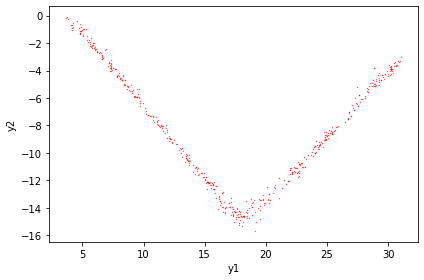

MSE test: 0.9998518628014917 


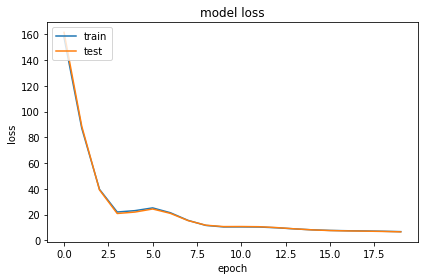

In [37]:
model = Mlp()
model.add(38, activation="sigmoid", input= 10, kernel_initializer = 1/np.sqrt(10), kernel_regularizer = 0.0001)
model.add(2, activation="linear", kernel_initializer = 1/np.sqrt(100), kernel_regularizer = 0.0001)

model.set_optimizer(
    SGD(
        lr = 0.018200000000000004,
        momentum = 0.8800000000000002,
        nesterov = True
    ))
# Batch
start_time = time.time()
model.fit(X_train,
            Y_train, 
            epochs=3600, 
            #batch_size=31,
            validation_data = [X_val, Y_val],
            verbose=1) 

print("--- %s seconds ---" % (time.time() - start_time))
outputNet = model.predict(X_val)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

printMSE(outputNet, Y_val, type = "test")
plt.plot(model.history["loss_mse"][:20])
plt.plot(model.history["val_loss_mse"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

Epoch: 1 - time: 0.0019 - loss_train: 202.66393475941186 - loss_val: 208.17036280189794
Epoch: 2 - time: 0.0020 - loss_train: 160.81562734287607 - loss_val: 166.42238523524918
Epoch: 3 - time: 0.0020 - loss_train: 71.15024717722717 - loss_val: 78.15164834753193
Epoch: 4 - time: 0.0020 - loss_train: 31.327784553813103 - loss_val: 37.07559660819896
Epoch: 5 - time: 0.0010 - loss_train: 18.67927875584298 - loss_val: 21.517720780130276
Epoch: 6 - time: 0.0006 - loss_train: 10.913907913712206 - loss_val: 11.72390564122623
Epoch: 7 - time: 0.0010 - loss_train: 8.413566782132582 - loss_val: 8.575110762220703
Epoch: 8 - time: 0.0010 - loss_train: 7.453944477077113 - loss_val: 7.8289305450047095
Epoch: 9 - time: 0.0030 - loss_train: 7.139284508567857 - loss_val: 7.60835436812588
Epoch: 10 - time: 0.0010 - loss_train: 6.507270576465033 - loss_val: 6.947112000474401
Epoch: 11 - time: 0.0020 - loss_train: 5.768784391168855 - loss_val: 6.089154923615058
Epoch: 12 - time: 0.0028 - loss_train: 5.1784

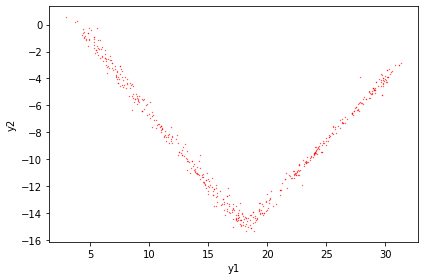

MSE test: 1.090828656738428 


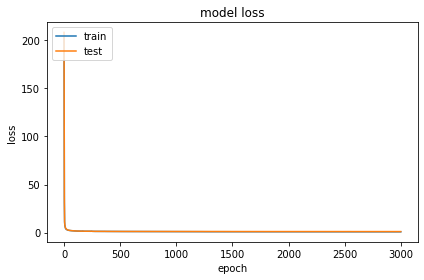

In [82]:
model = Mlp()
model.add(24, activation="relu", input= 10, kernel_initializer = 1/np.sqrt(10), kernel_regularizer = 0.0001)
model.add(2, activation="linear", kernel_initializer = 1/np.sqrt(100), kernel_regularizer = 0.0001)

model.set_optimizer(
    SGD(
        lr = 0.014200000000000004,
        momentum = 0.9000000000000002,
        nesterov = True
    ))
# Batch
start_time = time.time()
model.fit(X_train,
            Y_train, 
            epochs=3000, 
            #batch_size=31,
            validation_data = [X_val, Y_val],
            verbose=1) 

print("--- %s seconds ---" % (time.time() - start_time))
outputNet = model.predict(X_val)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

printMSE(outputNet, Y_val, type = "test")
plt.plot(model.history["loss_mse"])
plt.plot(model.history["val_loss_mse"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

# Dataset 2018-2019

In [38]:
TS2 = np.genfromtxt('../CUP/ML-CUP18-TR.csv',delimiter=',')

In [40]:
a = 0
for x in TS2:
    a = len(x)
print(a)

13


In [41]:
X2 = TS2[:,1:-2] #escludo il target e l'id

In [42]:
a = 0
for x in X2:
    a = len(x)
print(a)

10


In [43]:
df18 = pd.DataFrame(X2, columns=list('ABCDEFGHIL'))

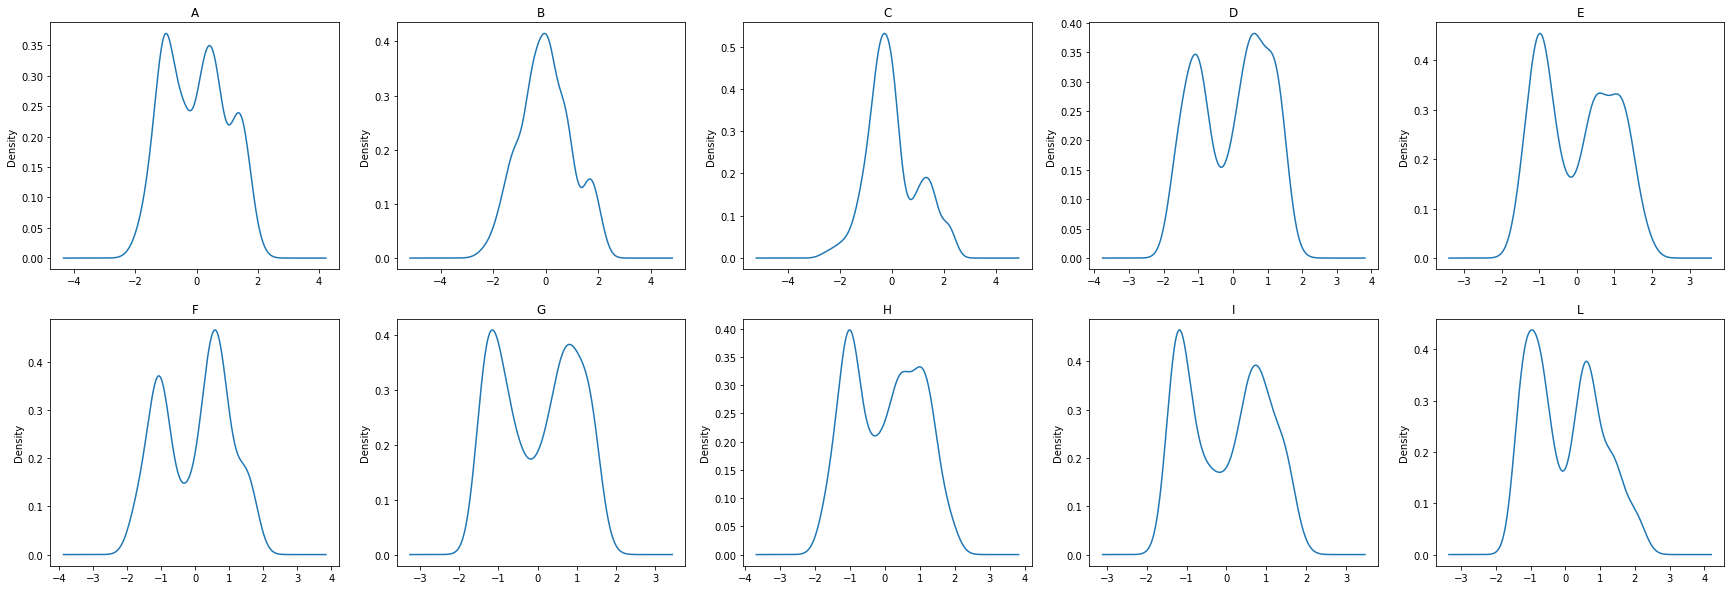

In [49]:
fig = plt.figure(figsize=(30, 10)) # any figure has 10x10 size
fig_dims = (2, 5) # 4 rows and 5 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df18['A'].plot(kind='kde')
plt.title('A')

plt.subplot2grid(fig_dims, (0, 1))
df18['B'].plot(kind='kde')
plt.title('B')

plt.subplot2grid(fig_dims, (0, 2))
df18['C'].plot(kind='kde')
plt.title('C')

plt.subplot2grid(fig_dims, (0, 3))
df18['D'].plot(kind='kde')
plt.title('D')

plt.subplot2grid(fig_dims, (0, 4))
df18['E'].plot(kind='kde')
plt.title('E')

plt.subplot2grid(fig_dims, (1, 0))
df18['F'].plot(kind='kde')
plt.title('F')

plt.subplot2grid(fig_dims, (1, 1))
df18['G'].plot(kind='kde')
plt.title('G')

plt.subplot2grid(fig_dims, (1, 2))
df18['H'].plot(kind='kde')
plt.title('H')

plt.subplot2grid(fig_dims, (1, 3))
df18['I'].plot(kind='kde')
plt.title('I')

plt.subplot2grid(fig_dims, (1, 4))
df18['L'].plot(kind='kde')
plt.title('L')

plt.show()

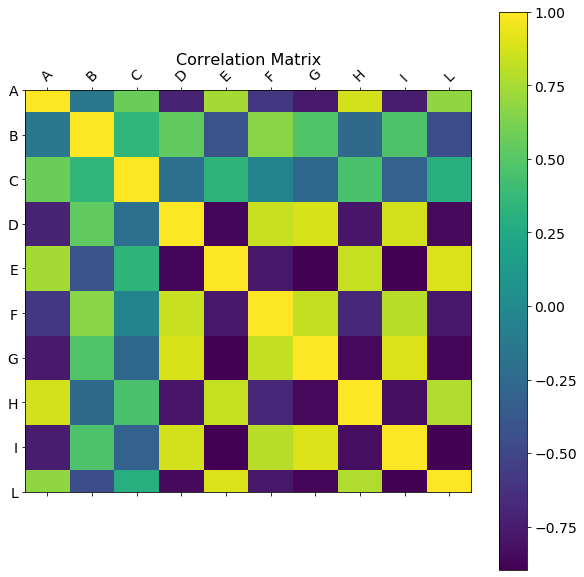

In [44]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df18.corr(), fignum=f.number)
plt.xticks(range(df18.shape[1]), df18.columns, fontsize=14, rotation=45)
plt.yticks(range(df18.shape[1]), df18.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);